<div style="text-align:center;border:1px solid gray; padding-top:20px;padding-bottom:20px">
    <h1>DATA 1202-DATA ANALYSIS TOOLS ANALYTICS</h1>
    <h1>Assignment #4</h1>
    <p style="text-align:center;"><strong>Submitted by: Group #7</strong><br/>Aysegul Yalcinkaya - 100841003<br/>Sayeed S Ahmed - 100853349<br/>Oluseye Ibitoye - 100873496<br/>Shedeva Campbell - 100867998<br/>Ifeoluwa Owolabi - 100888430</p>
</div>

<p>In this assignment we defined 3 functions to make our code more modular. We also passed the number of records, that we want to get, as a 
parameter to the function to make the function reusable for different number of records.<br/>
For the first question, we got top 1000 records from the dataframe after reading youtube.csv file. Then we calculated the channeltype distribution
both for all records and top 1000 records. At the end we plot the values in a bar chart.<br/>
For the second question, we saved the top 1000 rows into topresults.csv file. Then we imported this csv into youtube table in data1202 schema.<br/>
In the Test section of the assignment we displayed the number of rows and columns of youtube.csv file<br/>
In addition, we displayed the number of rows and columns in youtube table and the first 5 rows of table data<br/>
</p>

<h2>Import libraries</h2>

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt

<h2> Function that returns the Top N rows</h2>
<p>top_n function takes 2 arguments, dataframe and an integer value. This function gets the first N number of rows from the given dataframe (df) and returns the Top N rows.

In [2]:
def top_n(df,n):
    df_top_n=df.iloc[:n,:]
    return df_top_n

<h2> Function that calculates the distribution of channel type</h2>
<p>channeltype_distribution function takes 1 arguments, dataframe and returns the channeltype distribution.


In [3]:
# Function to get Top N rows from dataframe 
# and calculate the distribution of channel type
def channeltype_distibution(df_top_n):
    distribution=df_top_n["channeltype"].value_counts()
    return distribution

<h2>Function that load records into a csv file and database</h2>
<p>load_top_n function takes 1 arguments, dataframe. This function loads the records into "topresults.csv" file with headers. In the next step it loads the data into "youtube" table in "data1202" schema. If "youtube" table already exists, it is replaced.</p>

In [4]:
def load_top_n(df_top_n):

    # write top x data into csv file
    df_top_n.to_csv("topresults.csv",index=False)
    
    # load Top N rows into database
    try:
        engine=create_engine('mysql+pymysql://root:@localhost/data1202')
        df_top_n.to_sql("youtube",engine,if_exists='replace',index=False)
    except:
        print("Could not load data into database")

<h2> Read data from youtube.csv file</h2>

In [5]:
df=pd.read_csv("youtube_dataset.csv")

In [6]:
df.head()

,web-scraper-order,web-scraper-start-url,userID,userID-href,name,uploads,subscribers,videoviews,country,channeltype,usercreated,grade,YouTube_Link,YouTube_Link-href,TwitterHandle,TwitterHandle-href,InstagramHandle,InstagramHandle-href,MonthlyEarnings,YearlyEarnings
0,1553043067-5148,https://socialblade.com/youtube/top/5000/mosts...,PewDiePie,https://socialblade.com/youtube/c/pewdiepie,PewDiePie,3779,90210848,20772365682,US,Entertainment,"Apr 29th, 2010",A,NaN,https://youtube.com/channel/UC-lHJZR3Gqxm24_Vd...,NaN,https://twitter.com/pewdiepie,NaN,https://instagram.com/pewdiepie,€66.9K - €1.1M,€802.3K - €12.8M
1,1553043063-5147,https://socialblade.com/youtube/top/5000/mosts...,T-Series,https://socialblade.com/youtube/c/tseriesmusic,T-Series,13218,90194329,65092058996,IN,Music,"Mar 13th, 2006",A++,NaN,https://youtube.com/channel/UCq-Fj5jknLsUf-MWS...,NaN,https://instagram.com/tseries.official,NaN,https://plus.google.com/115156822320080163368,€635.6K - €10.2M,€7.6M - €122M
2,1553043059-5146,https://socialblade.com/youtube/top/5000/mosts...,Gaming,https://socialblade.com/youtube/channel/UCOpNc...,Gaming,0,81888222,0,NaN,Games,"Dec 15th, 2013",D-,NaN,https://youtube.com/channel/UCOpNcN46UbXVtpKMr...,NaN,NaN,NaN,https://youtube.com/channel/UCOpNcN46UbXVtpKMr...,€0 - €0,€0 - €0
3,1553043055-5145,https://socialblade.com/youtube/top/5000/mosts...,YouTube Movies,https://socialblade.com/youtube/channel/UClgRk...,YouTube Movies,0,77413743,0,NaN,Film,"Jun 10th, 2015",D-,NaN,https://youtube.com/channel/UClgRkhTL3_hImCAmd...,NaN,NaN,NaN,https://youtube.com/channel/UClgRkhTL3_hImCAmd...,€0 - €0,€0 - €0
4,1553043051-5144,https://socialblade.com/youtube/top/5000/mosts...,Sports,https://socialblade.com/youtube/channel/UCEgdi...,Sports,0,75622870,0,NaN,Sports,"Dec 15th, 2013",D-,NaN,https://youtube.com/channel/UCEgdi0XIXXZ-qJOFP...,NaN,NaN,NaN,https://youtube.com/channel/UCEgdi0XIXXZ-qJOFP...,€0 - €0,€0 - €0


In [7]:
df.shape

(3944, 20)

In [8]:
distribution_all=channeltype_distibution(df)

<h2> Call top_n function with parameters df and 1000. (Top 1000 rows will be returned)</h2>

In [9]:
df_top_1000=top_n(df,1000)

<h2> Call channeltype_distribution function with parameter df_top_1000. (Distribution of top 1000 rows will be returned)</h2>

In [10]:
distribution=channeltype_distibution(df_top_1000)
distribution

Entertainment    284
Music            240
Games            115
Comedy            76
People            72
Howto             49
Film              36
Education         30
Tech              19
News              17
Sports            17
Autos              3
Animals            2
Travel             1
Nonprofit          1
Name: channeltype, dtype: int64

<h2> Plot top 1000 rows channeltype distribution</h2>

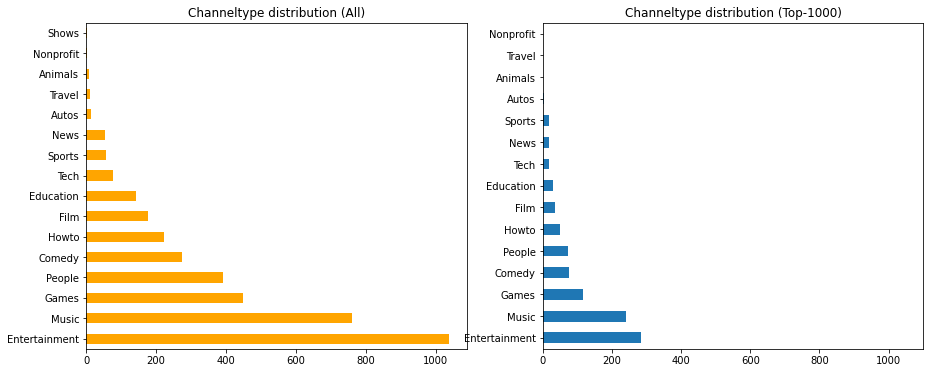

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 6))
distribution_all.plot(ax= axes[0], kind="barh",color="orange",
                      title="Channeltype distribution (All)") 
axes[1].set_xlim(0,1100)
distribution.plot(ax = axes[1], kind="barh",
                  title="Channeltype distribution (Top-1000)")
plt.show()

<h2> Call load_top_X function with parameters df and 1000. (Top 1000 rows will be saved into csv file and imported into database)</h2>

In [ ]:
load_top_n(df_top_1000)

<h1> TESTS </h1>
<p> This section shows that top 1000 records are saved into topresults.csv and importes into database youtube table.</p>
<h2>Get content of topresults.csv in order to see if it is loaded</h2>

In [ ]:
topresults=pd.read_csv("topresults.csv")
topresults.shape

In [ ]:
topresults.head()

<h2>Connect to database and select data from youtube table</h2>

In [ ]:
try:
    engine=create_engine('mysql+pymysql://root:@localhost/data1202')
    conn=engine.connect()
    df=pd.read_sql("select * from youtube",conn)
    print("Number of records and columns in youtube table ",df.shape)
    print(df.head())
except:
    print("Could not get data from database")

<h1>Assignment Log</h1>
<div style="text-align:left">
    <table style="margin-left: 10px;margin-right: auto;">
        <tr><td>Aysegul Yalcinkaya -100841003</td><td>Coding</td></tr>
        <tr><td>Shedeva Campbell - 100867998</td><td>Coding</td></tr>
        <tr><td>Oluseye Ibitoye - 100873496</td><td>Reporting &amp; Comments</td></tr>
        <tr><td>Sayeed S Ahmed - 100853349</td><td>Testing</td></tr>
        <tr><td>Ifeoluwa Owolabi - 100888430</td><td>Testing</td></tr>
    </table>
</div>